<font size="3">Table of Contents</font>
<div id="toc"></div>

# Vibration, See the unseen

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('W4s2UwKm7dc')

# Demonstratin of Beats

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('IYeV2Wq82fw')

In [7]:
%matplotlib inline
import numpy as np              # Grab all of the NumPy functions with nickname np
import matplotlib.pyplot as plt

In [8]:
t = np.linspace(0,20*np.pi,10000)
w1 = 4
w2 = 5
x1 = np.sin(w1*t)



(<matplotlib.axes._subplots.AxesSubplot at 0x9f071d0>,
 None)

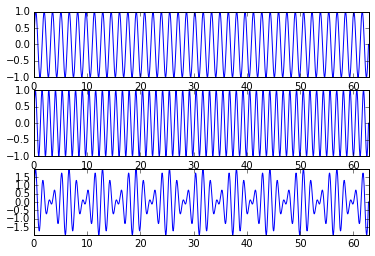

In [9]:
x2 = np.sin(w2*t)
x = x1 + x2

plt.subplot(3,1,1), plt.plot(t,x1), plt.autoscale(tight = True)
plt.subplot(3,1,2), plt.plot(t,x2), plt.autoscale(tight = True)
plt.subplot(3,1,3), plt.plot(t,x), plt.autoscale(tight = True)

In [10]:
from IPython.display import Audio
# load a remote WAV file
Audio('https://ccrma.stanford.edu/workshops/mir2014/audio/CongaGroove-mono.wav')

In [11]:
fs = 44100 # sampling frequency
T = 5    # seconds
t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable
x1 = np.sin(2*np.pi*440*t)                # pure sine wave at 440 Hz
x2 = np.sin(2*np.pi*444*t)                

x = x1 + x2
# load a NumPy array
Audio(x, rate=fs)

$$F_{res} = -c_1 v - c_2 v^2$$

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('kpt8vueHcAs')

# Simple Pendulum (non-linear differential equation)
- from https://faculty1.coloradocollege.edu/~sburns/toolbox/ODE_I.html

For large amplitudes this motion is no longer sinusoidal. To determine the angular displacement we must solve the differential equation:

$$ \frac{d^2\theta}{dt^2}=-\frac{g}{l}\sin(\theta) $$

We can't solve this equation analytically, but we can numerically. The first step is to, again, convert this second-order differential equation into two coupled first-order equations:

$$ \begin{align*} 
\theta'(t) &=  \omega(t) \\ 
\omega'(t) &=  -\frac{g}{l}\sin\left(\theta(t)\right)
\end{align*} $$


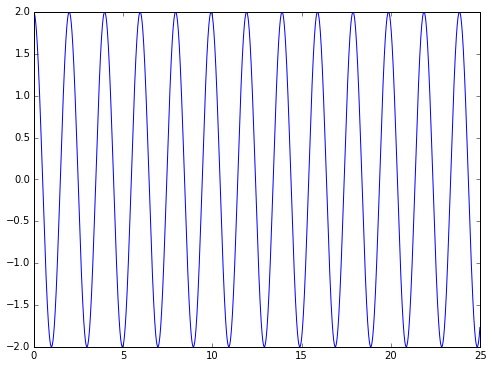

In [13]:
from scipy.integrate import odeint
# without air drag

def B(y,t):
    g = 10.;
    l = 1.;
    return [y[1], -g/l*(y[0])]

x0 = [2,0];
t = np.arange(0,25.0,0.01) 
y = odeint(B,x0,t)

plt.figure(figsize = (8,6))
plt.plot(t,y[:,0])
plt.show()

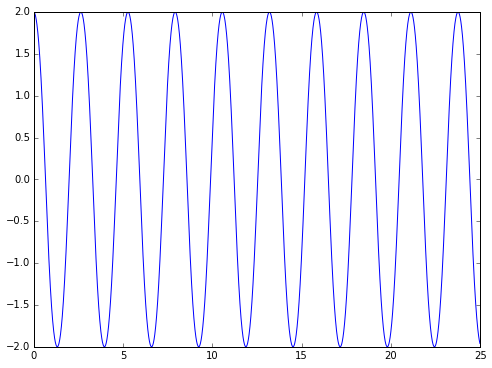

In [14]:
from scipy.integrate import odeint
# without air drag

def B6(y,t):
    g = 10.;
    l = 1.;
    return [y[1], -g/l*np.sin(y[0])]

t = np.arange(0,25.0,0.01)
y6 = odeint(B6,x0,t)

plt.figure(figsize = (8,6))
plt.plot(t,y6[:,0])
plt.show()

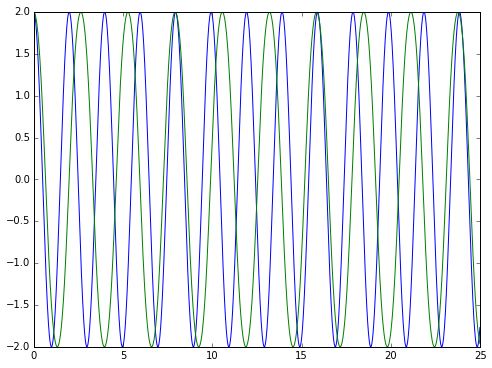

In [15]:
plt.figure(figsize = (8,6))
plt.plot(t,y[:,0],t,y6[:,0])
plt.show()

with air drag (resistance)

$$ \begin{align*} 
\theta'(t) &=  \omega(t) \\ 
\omega'(t) &=  -\frac{g}{l}\sin\left(\theta(t)\right) - c\,\omega(t)
\end{align*} $$

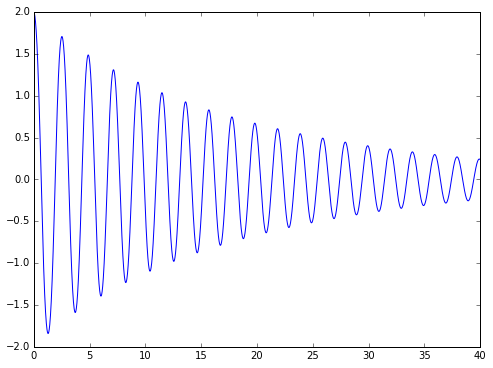

In [16]:
# with air drag (resistance)
x = [0.4,0]

def B1(y,t):
    g = 10.;
    l = 1.;
    c = 0.1;
    return [y[1], -g/l*np.sin(y[0])-c*y[1]]

t = np.arange(0,40.0,0.01)
y1 = odeint(B1,x0,t)

plt.figure(figsize = (8,6))
plt.plot(t,y1[:,0]), #plt.ylim([-0.4,0.4])
plt.show()

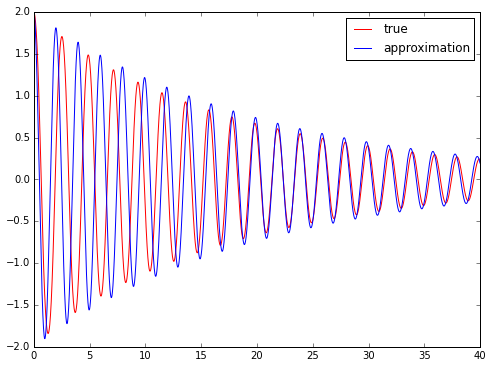

In [17]:
# with air drag (resistance)

x = [0.1,0]

def B1(y,t):
    g = 10.;
    l = 1.;
    c = 0.1;
    return [y[1], -g/l*np.sin(y[0])-c*y[1]]

def B2(y,t):
    g = 10.;
    l = 1.;
    c = 0.1;
    return [y[1], -g/l*y[0]-c*y[1]]

t = np.arange(0,40.0,0.01)
y1 = odeint(B1,x0,t)
y2 = odeint(B2,x0,t)

plt.figure(figsize = (8,6))
plt.plot(t,y1[:,0],'r',label = 'true')
plt.plot(t,y2[:,0],'b',label = 'approximation'), #plt.ylim([-0.4,0.4])
plt.legend()
plt.show()


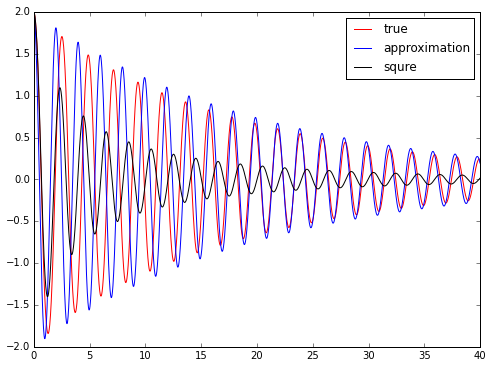

In [18]:
# with air drag (resistance)

def B3(y,t):
    g = 10.;
    l = 1.;
    c1 = 0.1;
    c2 = 0.1;
    return [y[1], -g/l*np.sin(y[0]) - c1*y[1] - c2*np.sign(y[1])*y[1]**2]

t = np.arange(0,40.0,0.01)
y3 = odeint(B3,x0,t)

plt.figure(figsize = (8,6))

plt.plot(t,y1[:,0],'r',label = 'true')
plt.plot(t,y2[:,0],'b',label = 'approximation'), #plt.ylim([-0.4,0.4])
plt.plot(t,y3[:,0],'k',label = 'squre') 

plt.legend()

#plt.ylim([-0.4,0.4])
plt.show()

# Damped Free Vibration

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_FreeVibration.png" alt="A Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System </strong>
</p>

This notebook simluates the free vibration of a simple mass-spring-damper system like the one shown in Figure 1. More specifically, we'll look at how system response to non-zero initial conditions. 

The equation of motion for the system is:

$ \quad m \ddot{x} + c \dot{x} + kx = 0 $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency $\omega_n$.

$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 0$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We'll use the solution to the differential equation that we developed in class to plot the response. The solution for the underdamped case is:

$ \quad x(t) = e^{-\zeta\omega_nt}\left(a_1 e^{i \omega_d t} + a_2 e ^{-i \omega_d t}\right) $ 

*or*

$ \quad x(t) = e^{-\zeta\omega_nt}\left(b_1 \cos{\omega_d t} + b_2 \sin{\omega_d t}\right) $

To use this equation, we need to solve for $a_1$ and $a_2$ or $b_1$ and $b_2$ using the initial conditions. Here, let's use the sin/cosine form. Solving the equation for generic intial velocity, $\dot{x} = v_0$, and a generic initial displacement, $x = x_0$, we find:

$ \quad x(t) = e^{-\zeta\omega_nt}\left(x_0 \cos{\omega_d t} + \frac{\zeta \omega_n x_0 + v_0}{\omega_d} \sin{\omega_d t}\right) $

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZqedDWEAUN4')

In [20]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [21]:
%matplotlib inline

# Import the plotting functions 
import matplotlib.pyplot as plt

In [22]:
# Define the System Parameters
m = 1.0                   # kg
k = (2.0 * np.pi)**2.     # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k/m)         # Natural Frequency (rad/s)

z = 0.1                   # Define a desired damping ratio
c = 2*z*wn*m              # calculate the damping coeff. to create it (N/(m/s))

wd = wn*np.sqrt(1 - z**2) # Damped natural frequency (rad/s)

In [23]:
# Set up simulation parameters
t = np.linspace(0, 5, 501)          # Time for simulation, 0-5s with 501 points in-between

# Define the initial conditions x(0) = 1 and x_dot(0) = 0
x0 = np.array([1.0, 0.0])

In [24]:
# Define x(t)
x = np.exp(-z*wn*t)*(x0[0]*np.cos(wd*t) + (z*wn*x0[0] + x0[1])/wd * np.sin(wd*t))

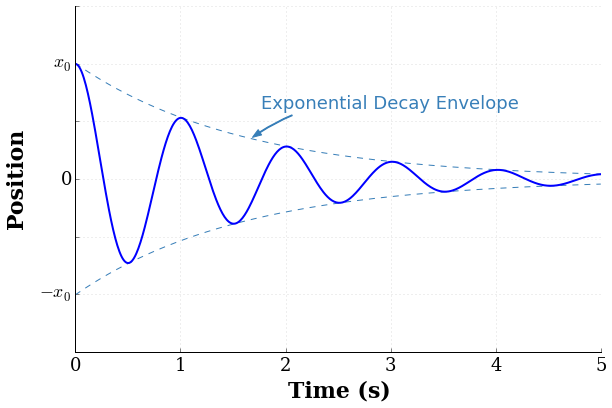

In [25]:
# # Make the figure pretty, then plot the results
# #   "pretty" parameters selected based on pdf output, not screen output
# #   Many of these setting could also be made default by the .matplotlibrc file

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position',family='serif',fontsize=22,weight='bold',labelpad=10)


amp = np.sqrt(x0[0]**2 + ((z*wn*x0[0] + x0[1])/wd)**2)
decay_env = amp * np.exp(-z*wn*t)

# plot the decay envelope
plt.plot(t, decay_env, linewidth=1.0, linestyle = '--', color = "#377eb8")
plt.plot(t, -decay_env, linewidth=1.0, linestyle = '--', color = "#377eb8")

plt.plot(t, x, linewidth=2, label=r'Response')

# uncomment below and set limits if needed
# xlim(0,5)
# ylim(0,10)

plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ['', r'$-x_0$', '', '0', '', r'$x_0$', ''])

plt.annotate('Exponential Decay Envelope',
         xy=(t[len(t)/3],decay_env[len(t)/3]), xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=18,
         arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3,rad=.2", color="#377eb8"), color = "#377eb8")


# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_FreeVibrationWithDamping.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

<function __main__.plot_response>

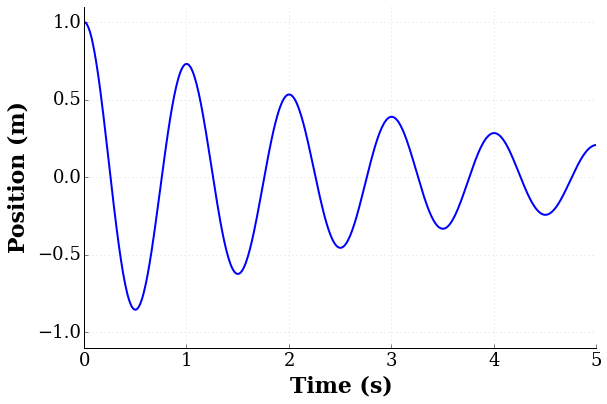

In [26]:
# import the IPython widgets
from IPython.html.widgets import interact
from IPython.html import widgets    # Widget definitions
from IPython.display import display # Used to display widgets in the notebook

# Set up the function that plots the repsonse based on slider changes
def plot_response(f = 1.0, z = 0.05):
    # Make the figure pretty, then plot the results
    #   "pretty" parameters selected based on pdf output, not screen output
    #   Many of these setting could also be made default by the .matplotlibrc file
    fig = plt.figure(figsize=(9, 6))
    ax = plt.gca()
    plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
    plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
    plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.grid(True,linestyle=':',color='0.75')
    ax.set_axisbelow(True)
    
    wn = 2*np.pi*f
    wd = wn*np.sqrt(1-z**2)
    
    # Define x(t)
    x = np.exp(-z*wn*t)*(x0[0]*np.cos(wd*t) + (z*wn*x0[0] + x0[1])/wd * np.sin(wd*t))
    
    plt.plot(t,x,color="blue",linewidth=2)
    plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
    plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)
    plt.ylim(-1.1,1.1)
    plt.xlim(0,5)
   

# Call the slider interaction
#  f is changes in frequency, allowing between 0.2 and 1.8Hz at 0.1Hz increments
#  z is damping ratio, allowing between 0 and 0.9 and 0.05 increments
interact(plot_response, f=(0.2, 1.8, 0.01), z = (0, 0.9, 0.01))

# Suspension system

In [27]:
from IPython.display import YouTubeVideo
YouTubeVideo('1W_J6UhQP6s')

# Vibration Visualization

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('AS67HA4YMCs')

# Forced Oscillation with Damper

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('pjzggPk8DO4?list=PLBD_gON7g_m06aIGNGB3BE_sV2rZdo8wX')

<function __main__.plot_response>

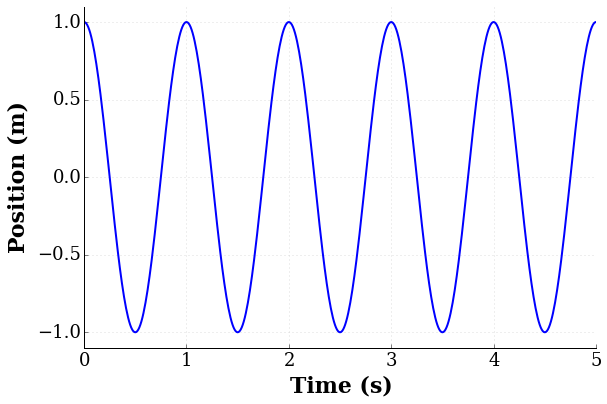

In [30]:
# can change mass and spring

# import the IPython widgets
from IPython.html.widgets import interact
from IPython.html import widgets    # Widget definitions
from IPython.display import display # Used to display widgets in the notebook


# Set up simulation parameters
t = np.linspace(0, 5, 501)          # Time for simulation, 0-5s with 501 points in-between

# Define the initial conditions x(0) = 1 and x_dot(0) = 0
x0 = np.array([1.0, 0.0])

# Set up the function that plots the repsonse based on slider changes
def plot_response(f = 1.0, z = 0.00):
    # Make the figure pretty, then plot the results
    #   "pretty" parameters selected based on pdf output, not screen output
    #   Many of these setting could also be made default by the .matplotlibrc file
    fig = plt.figure(figsize=(9, 6))
    ax = plt.gca()
    plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
    plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
    plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.grid(True,linestyle=':',color='0.75')
    ax.set_axisbelow(True)
    
    wn = 2*np.pi*f
    wd = wn*np.sqrt(1-z**2)
    
    # Define x(t)
    x = np.exp(-z*wn*t)*(x0[0]*np.cos(wd*t) + (z*wn*x0[0] + x0[1])/wd * np.sin(wd*t))
    
    plt.plot(t,x,color="blue",linewidth=2)
    plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
    plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)
    plt.ylim(-1.1,1.1)
    plt.xlim(0,5)
   

# Call the slider interaction
#  f is changes in frequency, allowing between 0.2 and 1.8Hz at 0.1Hz increments
#  z is damping ratio, allowing between 0 and 0.9 and 0.05 increments
interact(plot_response, f=(0.2, 1.8, 0.01), z = (0, 0.9, 0.01))

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('TYA8C85CdCc?list=PLBD_gON7g_m06aIGNGB3BE_sV2rZdo8wX')

$$ \quad m \ddot{x} + c \dot{x} + kx = F_0\cos(\omega t) $$

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = \frac{F_0}{m}\cos(\omega t)$$


In [32]:
from control import *

([<matplotlib.lines.Line2D at 0x191ac320>],
 None,
 (6.283185307179586, 18.84955592153876))

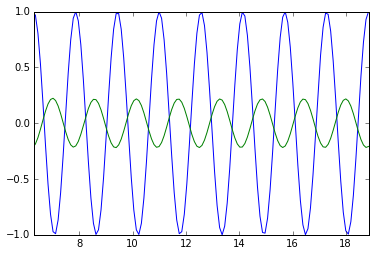

In [33]:
m = 1;
c = 0.1;
k = 1;
F0 = 1;


z = 0.5; 
wn = 1; 
G = TransferFunction(wn^2,[1,2*z*wn,wn^2])

x0 = 0;
w = 4;

t = np.linspace(0,6*np.pi,200);
f = np.cos(w*t);

[y,tout,xout] = matlab.lsim(G,f,t,x0);

plt.plot(t,f)
plt.plot(tout,y), plt.autoscale(tight=True), plt.xlim([2*np.pi,6*np.pi])

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('S9gr4w_U9Qs')


In [35]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>